In [7]:

#Rafael Reis Dantas - 1272019364


import pandas as pd
import numpy as np
import warnings
import seaborn as sns #Cria gráficos estatísticos 
import matplotlib.pyplot as plt #Usado para trabalhar com gráficos
from sklearn.linear_model import LinearRegression #Ajusta um modelo linear com os dados do Dataset
from scipy.interpolate import interp1d
from datetime import datetime

#Importando dados do csv
tabela_data = pd.read_csv("Documents\DATA.csv", sep = ",")
tabela_pib = pd.read_csv("Documents\PIB.csv", sep = ",", low_memory = False)

#Checando o Dataset
tabela_pib.head()
tabela_data.head()

,Unnamed: 0,2016,2016.1,2016.2,2015,2015.1,2015.2,2014,2014.1,2014.2,...,1978.2,1977,1977.1,1977.2,1976,1976.1,1976.2,1975,1975.1,1975.2
0,NaN,"Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...",...,"Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great..."
1,NaN,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,...,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years
2,Country,Both sexes,Male,Female,Both sexes,Male,Female,Both sexes,Male,Female,...,Female,Both sexes,Male,Female,Both sexes,Male,Female,Both sexes,Male,Female
3,Afghanistan,5.5 [3.4-8.1],3.2 [1.3-6.4],7.6 [4.3-12.4],5.2 [3.3-7.7],3.0 [1.3-6.0],7.3 [4.1-11.8],4.9 [3.1-7.3],2.8 [1.2-5.6],7.0 [4.0-11.3],...,0.9 [0.3-2.2],0.6 [0.2-1.2],0.2 [0.0-0.7],0.9 [0.3-2.1],0.5 [0.2-1.1],0.2 [0.0-0.7],0.8 [0.2-2.0],0.5 [0.2-1.1],0.2 [0.0-0.6],0.8 [0.2-2.0]
4,Albania,21.7 [17.0-26.7],21.6 [14.8-29.0],21.8 [15.3-28.9],21.1 [16.6-26.0],20.9 [14.4-28.1],21.3 [15.1-28.1],20.5 [16.2-25.1],20.2 [13.9-27.3],20.8 [14.9-27.4],...,9.1 [4.6-15.5],6.8 [4.0-10.7],4.8 [2.0-9.3],8.9 [4.3-15.4],6.7 [3.8-10.6],4.6 [1.8-9.2],8.8 [4.1-15.4],6.5 [3.6-10.5],4.4 [1.7-9.2],8.6 [3.9-15.4]


In [8]:
#Limpando o Dataset

tabela_data.drop([0,1,2], inplace = True) #Elimina as 3 primeiras fileiras
tabela_data.reset_index(drop = True, inplace = True) #Reseta o Index das colunas
tabela_data.rename(columns = {'Unnamed: 0': 'Country'}, inplace = True) #Renomea a 'Coluna 0' para 'Country' 

ndf = tabela_data.melt('Country', var_name = 'Year', value_name = 'Obesity (%)') #Transformar colunas em linhas e criar 4 Colunas: 'Country','Year','Obesity (%)' e 'Sex' 
ndf[['Year', 'Sex']] = ndf['Year'].str.split('.', expand = True)

ndf = ndf.sort_values(by = ['Country','Year']) #Ordenando o Dataset
ndf = ndf.reset_index(drop = True) #Resetando os índices
ndf['Sex'] = ndf['Sex'].map({None: 'Both sexes', '1': 'Male', '2':'Female'}) #Categoriza a coluna 'Sex'
ndf['Obesity (%)'] = ndf['Obesity (%)'].str.extract(r'([\d.]+)').astype(float) #Extraindo a % e convertendo a coluna 'Obesity (%)' para float

print(ndf)

           Country  Year  Obesity (%)         Sex
0      Afghanistan  1975          0.5  Both sexes
1      Afghanistan  1975          0.2        Male
2      Afghanistan  1975          0.8      Female
3      Afghanistan  1976          0.5  Both sexes
4      Afghanistan  1976          0.2        Male
...            ...   ...          ...         ...
24565     Zimbabwe  2015          4.5        Male
24566     Zimbabwe  2015         24.8      Female
24567     Zimbabwe  2016         15.5  Both sexes
24568     Zimbabwe  2016          4.7        Male
24569     Zimbabwe  2016         25.3      Female

[24570 rows x 4 columns]


A média de obesidade por gênero de todos o paises é de:
            Obesity (%)
Sex                    
Both sexes    12.480379
Female        15.533433
Male           9.332984


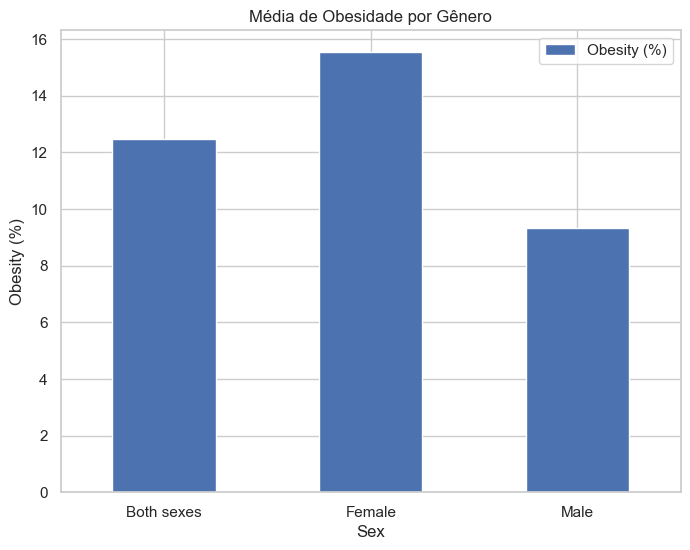

In [9]:
#Dados entre homens e mulheres são parecidos?

#Agrupando os dados por gênero e tirando a média
tab1 =  pd.DataFrame((ndf.groupby('Sex')['Obesity (%)'].mean()))

print("A média de obesidade por gênero de todos o paises é de:")
print(tab1)


#Gráfico
tab1.plot(kind = 'bar', figsize = (8, 6))

plt.title('Média de Obesidade por Gênero')
plt.xlabel('Sex')
plt.ylabel('Obesity (%)')
plt.xticks(rotation = 0)
plt.show()

O percentual médio dos paises da América do Norte por gênero é:
                                 Obesity (%)
Country                  Sex                
Canada                   Female         26.2
                         Male           25.8
Mexico                   Female         29.8
                         Male           21.1
United States of America Female         33.3
                         Male           31.2


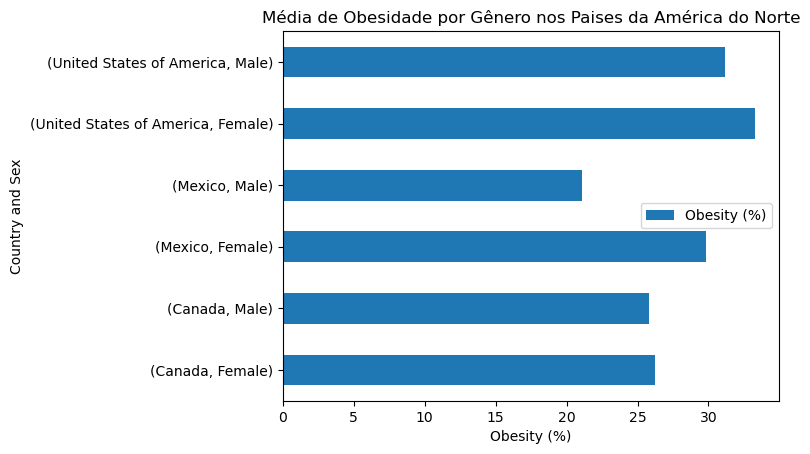

In [6]:
#Qual o percentual médio de obesidade por sexo na américa do norte no ano de 2010?

#Filtros dos paises America do Norte e o ano
paises = ('United States of America', 'Canada', 'Mexico') 
ano = '2010' 
sex = ('Female', 'Male')

#Filtrando a tabela pelos paises e pelo ano, agrupando por gênero e pais, tirando a média 
tab2 = ndf.loc[(ndf['Country'].isin(paises)) & (ndf['Year'] == ano)]
tab2 = tab2.loc[tab2['Sex'].isin(sex)]
tab2 = pd.DataFrame(tab2.groupby(['Country', 'Sex'])['Obesity (%)'].mean())

print("O percentual médio dos paises da América do Norte por gênero é:")
print(tab2)

#Gráfico
tab2.plot.barh()

plt.title('Média de Obesidade por Gênero nos Paises da América do Norte')
plt.xlabel('Obesity (%)')
plt.ylabel('Country and Sex')
plt.xticks(rotation = 0)
plt.show()

Top 3 países com maior aumento nos índices de obesidade no período entre 2010 e 2016:
              Country  Obesity (%)
0               Haiti     4.933333
1                Niue     4.733333
2  Dominican Republic     4.633333

Top 3 países com Menor aumento nos índices de obesidade no período entre 2010 e 2016:
             Country  Obesity (%)
0          Singapore     0.700000
1           Viet Nam     0.766667
2  Republic of Korea     0.766667


C:\Apps\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Apps\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


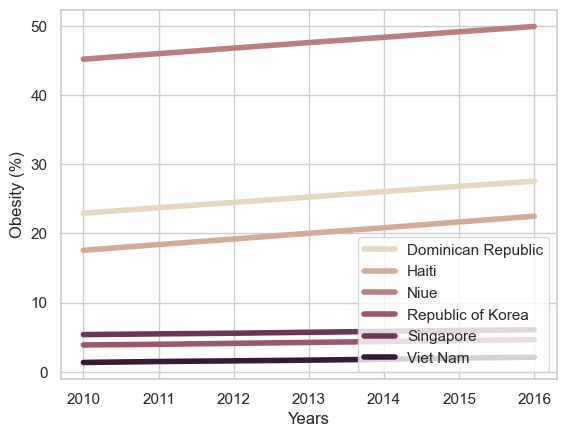

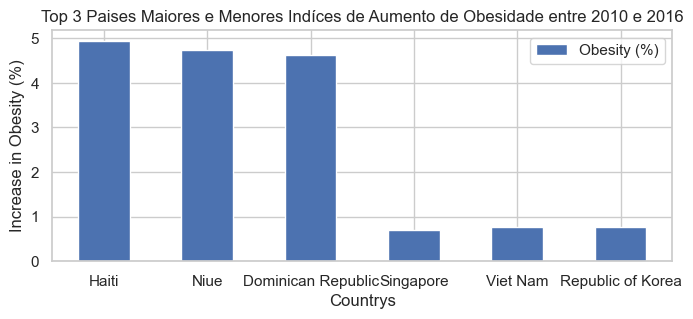

In [10]:
#Qual os top 3 com maior e menor taxa de aumento de índices de obesidade nesse período de 2010? E em 2016? 

#Filtro dos anos
ano1 = '2010'
ano2 = '2016'

#Filtrando os dados por ano, agrupando por pais e tirando a média de obesidade
dados_2010 = ndf.loc[ndf['Year'] == ano1].groupby('Country')['Obesity (%)'].mean()
dados_2016 = ndf.loc[ndf['Year'] == ano2].groupby('Country')['Obesity (%)'].mean()

#Calculando Variação do ano entre 2016 e 2010
tab3 = dados_2016 - dados_2010

#Classificando os países pela variação nos índices de obesidade
top3_aumento =  pd.DataFrame(tab3.sort_values(ascending = False).head(3))
top3_diminuicao =  pd.DataFrame(tab3.sort_values().head(3))
top3_aumento.reset_index(inplace = True)
top3_diminuicao.reset_index(inplace = True)

#Agrupando em uma tabela todos os paises com maiores e menores indices
top3_complet = pd.DataFrame(pd.concat([tab3.sort_values(ascending = False).head(3), tab3.sort_values().head(3)]))


#Criando uma tabela de com a media de indice de obecidade por pais entre 2010 e 2016
top3_aumento_paises = top3_aumento['Country']
top3_diminuicao_paises = top3_diminuicao['Country']
paises_complet = pd.DataFrame(pd.concat([top3_aumento_paises,top3_diminuicao_paises]))
paises_complet.reset_index(drop = True, inplace = True)

dados_complet = pd.DataFrame(ndf.loc[(ndf['Year'] >= ano1) & (ndf['Year'] <= ano2) & (ndf['Country'].isin(paises_complet['Country']))].groupby(['Country', 'Year'])['Obesity (%)'].mean())

print("Top 3 países com maior aumento nos índices de obesidade no período entre 2010 e 2016:")
print(top3_aumento)

print("\nTop 3 países com Menor aumento nos índices de obesidade no período entre 2010 e 2016:")
print(top3_diminuicao)


#Gráfico 1
sns.set()
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 4})
sns.lineplot(data = dados_complet, x = "Year", y = "Obesity (%)", hue = "Country", palette = "ch:.25")

plt.xlabel('Years')
plt.ylabel('Obesity (%)')
plt.legend(loc = 'lower right')
plt.show()

#Gráfico 2
top3_complet.plot(kind = 'bar', figsize = (8, 3))

plt.title('Top 3 Paises Maiores e Menores Indíces de Aumento de Obesidade entre 2010 e 2016')
plt.xlabel('Countrys')
plt.ylabel('Increase in Obesity (%)')
plt.xticks(rotation = 0)
plt.show()

Top 3 países com maior aumento nos índices de obesidade no período completo:
    Country  Obesity (%)
0    Tuvalu         33.7
1      Niue         31.1
2  Kiribati         30.1

Top 3 países com menor aumento nos índices de obesidade no período completo:
     Country  Obesity (%)
0   Viet Nam          2.0
1  Singapore          3.1
2      Japan          3.3


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


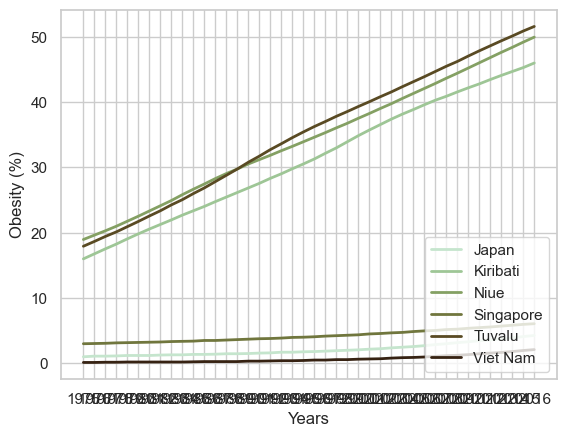

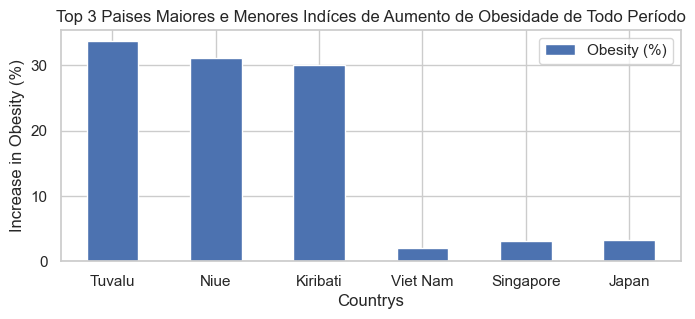

In [8]:
#Top 3 com maior e menor taxa de aumento de índices de obesidade no período completo

#Filtro do primeiro e ultimo ano
primeiro_ano = pd.DataFrame(ndf['Year'].sort_values().head(1))
ultimo_ano = pd.DataFrame(ndf['Year'].sort_values(ascending = False).head(1))
primeiro_ano.reset_index(drop = True, inplace = True)
ultimo_ano.reset_index(drop = True, inplace = True)

# Calculando a diferença entre o primeiro e o último valor de índice de obesidade para cada país
variacao_obesidade = ndf.loc[ndf['Sex'] == 'Both sexes'].groupby('Country')['Obesity (%)'].last() - ndf.loc[ndf['Sex'] == 'Both sexes'].groupby('Country')['Obesity (%)'].first()

#Classificando os países pela variação nos índices de obesidade
top3_aumento_Country = pd.DataFrame(variacao_obesidade.sort_values(ascending = False).head(3))
top3_diminuicao_Country = pd.DataFrame(variacao_obesidade.sort_values().head(3))
top3_aumento_Country.reset_index(inplace = True)
top3_diminuicao_Country.reset_index(inplace = True)

Country_top3_aumento = top3_aumento_Country['Country']
Country_top3_diminuicao = top3_diminuicao_Country['Country']
top3_paises_complet = pd.DataFrame(pd.concat([Country_top3_aumento, Country_top3_diminuicao]))
top3_paises_complet.reset_index(drop = True, inplace = True)

#Unindo em um DataFrame os 3 paises com maiores e menores aumento de indice de obesidade
top3_variacao_complet = pd.DataFrame(pd.concat([variacao_obesidade.sort_values(ascending = False).head(3), variacao_obesidade.sort_values().head(3)]))

variacao_obesidade_complet_min = pd.DataFrame(ndf.loc[(ndf['Year'] >= '1975') & (ndf['Year'] <= '2016') & (ndf['Country'].isin(top3_paises_complet['Country']))].groupby(['Country', 'Year'])['Obesity (%)'].mean())

print("Top 3 países com maior aumento nos índices de obesidade no período completo:")
print(top3_aumento_Country)

print("\nTop 3 países com menor aumento nos índices de obesidade no período completo:")
print(top3_diminuicao_Country)


#Gráfico 1
sns.set()
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale = 1, rc = {"lines.linewidth": 2})
sns.lineplot(data = variacao_obesidade_complet_min, x = "Year", y = "Obesity (%)", hue = "Country", palette = "ch: 25")

plt.xlabel('Years')
plt.ylabel('Obesity (%)')
plt.legend(loc = 'lower right')
plt.show()

#Gráfico 2
top3_variacao_complet.plot(kind = 'bar', figsize = (8, 3))

plt.title('Top 3 Paises Maiores e Menores Indíces de Aumento de Obesidade de Todo Período')
plt.xlabel('Countrys')
plt.ylabel('Increase in Obesity (%)')
plt.xticks(rotation = 0)
plt.show()

A média de obesidade por gênero de todo o periodo no Brasil é de:
Sex
Both sexes    12.883333
Female        15.850000
Male           9.671429
Name: Obesity (%), dtype: float64

Ano com Maior índice de obesidade no Brasil:
Year           2016
Obesity (%)    22.1
Name: 3021, dtype: object

Ano com Menor índice de obesidade no Brasil:
Year           1975
Obesity (%)     5.2
Name: 2898, dtype: object


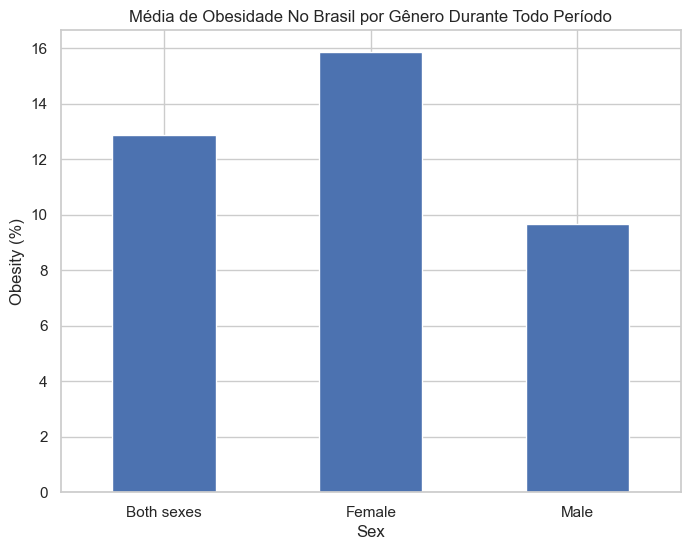

C:\Apps\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Apps\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


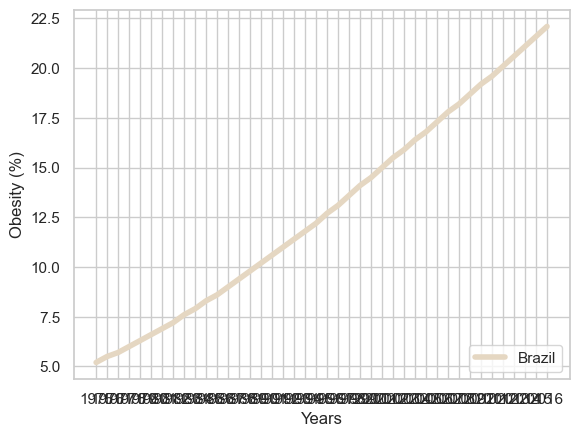

In [11]:
#Informações sobre o Brasil

#Agrupando os dados por gênero e tirando a média de todo o periodo
tab1_brazil = (ndf.loc[ndf['Country'] == 'Brazil'].groupby('Sex')['Obesity (%)'].mean())

print("A média de obesidade por gênero de todo o periodo no Brasil é de:")
print(tab1_brazil)

#O ano com maior índice de obesidade
filtro_brazil = ndf.loc[(ndf['Country'] == 'Brazil') & (ndf['Sex'] == 'Both sexes')] #Filtrando pelo país e pelo Gênero
indice_max_obesidade = filtro_brazil['Obesity (%)'].idxmax() #Pegando o índice de maior valor da coluna Obesity (%)
ano_max_obesidade = ndf.loc[indice_max_obesidade, ['Year', 'Obesity (%)']] #Pegando as informações do ano e índice de obesidade através do indice encontrado

dados_brazil = pd.DataFrame(ndf.loc[(ndf['Country'] == 'Brazil') & (ndf['Sex'] == 'Both sexes')])

print("\nAno com Maior índice de obesidade no Brasil:")
print(ano_max_obesidade)


#O ano com menor índice de obesidade
indice_min_obesidade = filtro_brazil['Obesity (%)'].idxmin() #Pegando o índice de menor valor da coluna Obesity (%)
ano_min_obesidade = ndf.loc[indice_min_obesidade, ['Year', 'Obesity (%)']] #Pegando as informações do ano e índice de obesidade através do indice encontrado

print("\nAno com Menor índice de obesidade no Brasil:")
print(ano_min_obesidade)


#Gráfico1
tab1_brazil.plot(kind = 'bar', figsize = (8, 6))

plt.title('Média de Obesidade No Brasil por Gênero Durante Todo Período')
plt.xlabel('Sex')
plt.ylabel('Obesity (%)')
plt.xticks(rotation = 0)
plt.show()

#Gráfico 2
sns.set()
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 4})
sns.lineplot(data = dados_brazil, x = "Year", y = "Obesity (%)", hue = "Country", palette = "ch:.25")

plt.xlabel('Years')
plt.ylabel('Obesity (%)')
plt.legend(loc = 'lower right')
plt.show()



In [12]:
#Limpando Dataset
tabela_pib.rename(columns={' GDP_pp ': 'PIB'}, inplace=True)
ndf_pib = tabela_pib.sort_values(by = ['Country','Region','Year'])
ndf_pib['PIB'] = ndf_pib['PIB'].str.replace(',', '').astype(float)
ndf_pib['Year'] = pd.to_datetime(ndf_pib['Year'], format='%d/%m/%Y')
ndf_pib['Year'] = ndf_pib['Year'].dt.year

paises_regioes = ndf_pib[['Country', 'Region']].drop_duplicates()

ultimo_ano = ndf_pib['Year'].max()

# Criar um DataFrame com todos os anos entre o primeiro e o último ano de cada país e região
df_completo = pd.DataFrame()
for (pais, regiao), grupo in ndf_pib.groupby(['Country', 'Region']):
    anos_completos = pd.DataFrame({'Year': range(grupo['Year'].min(), ultimo_ano + 1)})
    anos_completos['Country'] = pais
    anos_completos['Region'] = regiao
    df_completo = pd.concat([df_completo, anos_completos])

# Mesclar com os dados originais para preencher os valores de PIB
df_completo = pd.merge(df_completo, ndf_pib, on=['Country', 'Region', 'Year'], how='left')

# Interpolar os valores de PIB para preencher os anos faltantes
ndf_pib = df_completo.groupby(['Country', 'Region']).apply(lambda x: x.interpolate(method='linear')).reset_index(drop=True)

# Exibir o resultado final
print(ndf_pib.head(6))

   Year      Country                                         Region     PIB
0  1901  Afghanistan  Middle East, North Africa, and Greater Arabia  613.99
1  1902  Afghanistan  Middle East, North Africa, and Greater Arabia  616.00
2  1903  Afghanistan  Middle East, North Africa, and Greater Arabia  618.01
3  1904  Afghanistan  Middle East, North Africa, and Greater Arabia  620.02
4  1905  Afghanistan  Middle East, North Africa, and Greater Arabia  622.03
5  1906  Afghanistan  Middle East, North Africa, and Greater Arabia  624.04


C:\Users\alexl\AppData\Local\Temp\ipykernel_9884\1344741509.py:24: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  ndf_pib = df_completo.groupby(['Country', 'Region']).apply(lambda x: x.interpolate(method='linear')).reset_index(drop=True)
C:\Users\alexl\AppData\Local\Temp\ipykernel_9884\1344741509.py:24: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  ndf_pib = df_completo.groupby(['Country', 'Region']).apply(lambda x: x.interpolate(method='linear')).reset_index(drop=True)
C:\Users\alexl\AppData\Local\Temp\ipykernel_9884\1344741509.py:24: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  ndf_pib = df_completo.groupby(['Cou

Regiões com maior crescimento PIB
                                                                  PIB
Country       Region                                                 
Qatar         Middle East, North Africa, and Greater Arabia  88334.84
Liechtenstein Europe                                         86381.78
Luxembourg    Europe                                         66881.71


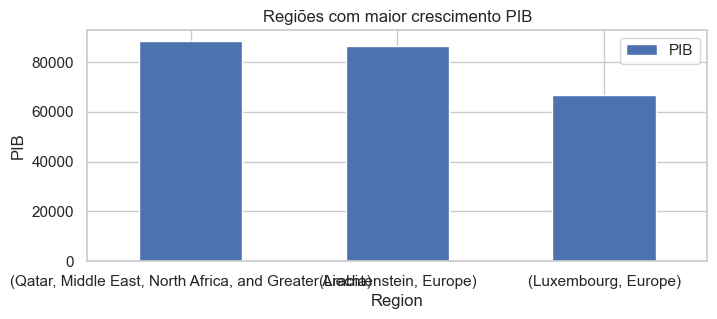

In [13]:
#Informe as regiões de maiores crescimentos de PIB

variacao_pib = ndf_pib.groupby(['Country', 'Region'])['PIB'].last() - ndf_pib.groupby(['Country', 'Region'])['PIB'].first()

#Classificando os países pela variação do PIB
top3_aumento_PIB = pd.DataFrame(variacao_pib.sort_values(ascending = False).head(3))

print("Regiões com maior crescimento PIB")
print(top3_aumento_PIB)

#Gráfico
top3_aumento_PIB.plot(kind = 'bar', figsize = (8, 3))

plt.title('Regiões com maior crescimento PIB')
plt.xlabel('Region')
plt.ylabel('PIB')
plt.xticks(rotation = 0)
plt.show()

In [14]:
# Correlação entre Datasets

ndf_pib['Year'] = ndf_pib['Year'].astype(str)
ndf_pib['Country'] = ndf_pib['Country'].replace('United States', 'United States of America')


# Mesclando os DataFrames usando 'Country' e 'Year' como chaves de junção
merged_df = pd.DataFrame(pd.merge(ndf, ndf_pib, on = ['Country', 'Year']))
merged_df.reset_index(drop = True, inplace = True)

print(merged_df)

data_atual = datetime.now().strftime("%d_%m_%Y")
nome_arquivo = f"{data_atual}_A3_Equipe_AAILRR.csv"
print(f'Arquivo CSV "{nome_arquivo}" gerado com sucesso.')

merged_df.to_csv(nome_arquivo, index = False)

           Country  Year  Obesity (%)         Sex  \
0      Afghanistan  1975          0.5  Both sexes   
1      Afghanistan  1975          0.2        Male   
2      Afghanistan  1975          0.8      Female   
3      Afghanistan  1976          0.5  Both sexes   
4      Afghanistan  1976          0.2        Male   
...            ...   ...          ...         ...   
18532     Zimbabwe  2010          3.7        Male   
18533     Zimbabwe  2010         22.6      Female   
18534     Zimbabwe  2011         14.1  Both sexes   
18535     Zimbabwe  2011          3.9        Male   
18536     Zimbabwe  2011         23.0      Female   

                                              Region      PIB  
0      Middle East, North Africa, and Greater Arabia  847.692  
1      Middle East, North Africa, and Greater Arabia  847.692  
2      Middle East, North Africa, and Greater Arabia  847.692  
3      Middle East, North Africa, and Greater Arabia  866.190  
4      Middle East, North Africa, and Great

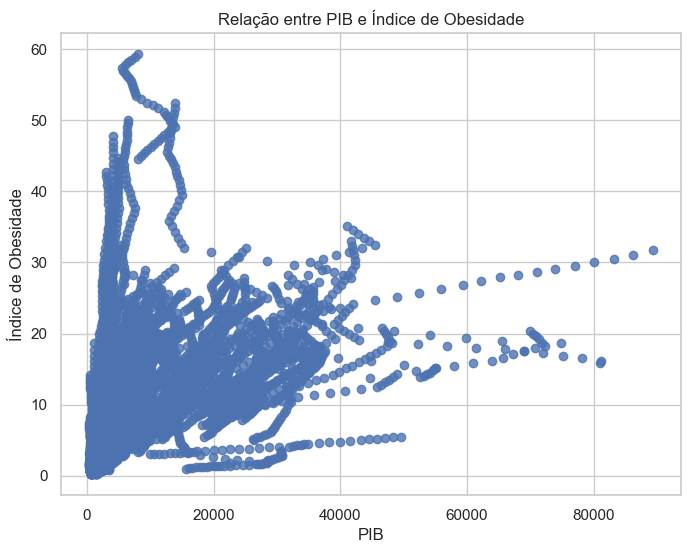

In [16]:
#Quanto mais dinheiro, mais obeso?

paises_pib = ndf_pib['Country'].drop_duplicates()

merged_df = merged_df[(merged_df['Sex'] == 'Both sexes') & (merged_df['Country'].isin(paises_pib))]

#Gráfico de dispersão PIB vs Índice de Obesidade
plt.figure(figsize = (8, 6))
plt.scatter(merged_df['PIB'], merged_df['Obesity (%)'], alpha = 0.8) #Cria o gráfico de dispersão usando os dados de PIB e Índice de Obesidade
plt.title('Relação entre PIB e Índice de Obesidade')
plt.xlabel('PIB')
plt.ylabel('Índice de Obesidade')
plt.grid(True)
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


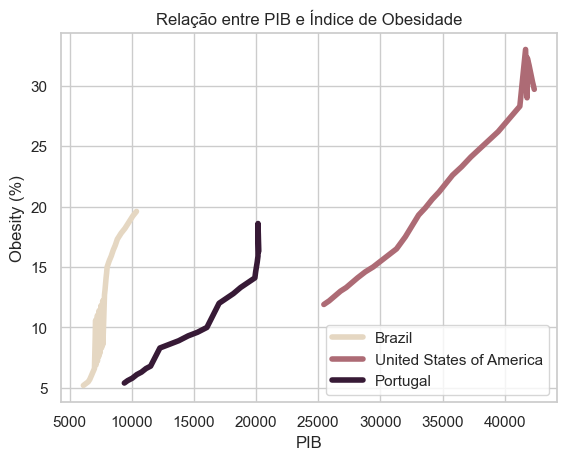

In [18]:
#Qual a diferença entre Brasil, USA e Portugal?

merged_df = pd.DataFrame(merged_df)

# Filtrando dados para Brasil, EUA e Portugal
brasil_data = merged_df[merged_df['Country'] == 'Brazil']
eua_data = merged_df[merged_df['Country'] == 'United States of America']
portugal_data = merged_df[merged_df['Country'] == 'Portugal']

data_complet = pd.DataFrame(pd.concat([brasil_data, eua_data, portugal_data]))

#Gráfico 1
sns.set()
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 4})
sns.lineplot(data = data_complet, x = "PIB", y = "Obesity (%)", hue = "Country", palette = "ch:.25")

plt.title('Relação entre PIB e Índice de Obesidade')
plt.xlabel('PIB')
plt.ylabel('Obesity (%)')
plt.legend(loc = 'lower right')
plt.show()